In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plotly
import seaborn as sns
from sklearn import preprocessing
import geopandas as gpd
%matplotlib inline

In [2]:
from plotly import __version__
import plotly.offline as py 
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
df=pd.read_csv("E:\\Semester 2\\Predictive analysis\\AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df1=df.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
df2=df.sort_values(by=['price'],ascending=False).head(1000)

In [7]:
print('Rooms with the most number of reviews')
Long=-73.80
Lat=40.80
mapdf1=folium.Map([Lat,Long],zoom_start=10,)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df1.latitude,df1.longitude,df1.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

Rooms with the most number of reviews


In [8]:
print('Most Expensive rooms')
Long=-73.80
Lat=40.80
mapdf1=folium.Map([Lat,Long],zoom_start=10,)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df2.latitude,df2.longitude,df2.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

Most Expensive rooms


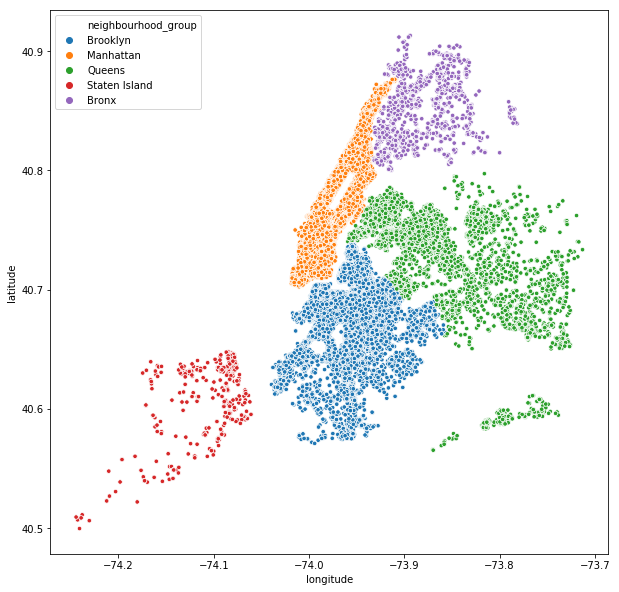

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=df)


In [5]:
df3=df.groupby(['neighbourhood_group']).mean()
df3.drop(['latitude', 'longitude','host_id','id'],axis=1)
df4=df.groupby(['neighbourhood_group','neighbourhood']).mean()

In [6]:
r1=df4.loc['Bronx'].number_of_reviews.sum().round()
r2=df4.loc['Brooklyn'].number_of_reviews.sum().round()
r3=df4.loc['Manhattan'].number_of_reviews.sum().round()
r4=df4.loc['Queens'].number_of_reviews.sum().round()
r5=df4.loc['Staten Island'].number_of_reviews.sum().round()

In [7]:
abcd=df['neighbourhood_group'].value_counts()
dfabcd=pd.DataFrame(abcd)
dfabcd.reset_index(inplace=True)
reviews = [r1,r2,r3,r4,r5]
review = pd.DataFrame(data=reviews,index=dfabcd['index'],columns=['values'],)
review.reset_index(inplace=True)


In [8]:
df['room_type'].value_counts()

df5 = df.groupby(['neighbourhood_group','room_type']).mean()

room_types_neighbourhoods=df5.drop(['id','host_id','latitude','longitude','number_of_reviews','reviews_per_month'],axis=1)

room_types_neighbourhoods

price  minimum_nights  \
neighbourhood_group room_type                                     
Bronx               Entire home/apt  127.506596        5.957784   
                    Private room      66.788344        3.858896   
                    Shared room       59.800000        3.366667   
Brooklyn            Entire home/apt  178.327545        6.531332   
                    Private room      76.500099        5.539479   
                    Shared room       50.527845        7.753027   
Manhattan           Entire home/apt  249.239109       10.539283   
                    Private room     116.776622        5.446880   
                    Shared room       88.977083        6.766667   
Queens              Entire home/apt  147.050573        5.369752   
                    Private room      71.762456        5.120107   
                    Shared room       69.020202        4.232323   
Staten Island       Entire home/apt  173.846591        6.238636   
                    Private room      62.292553        3.632979   
                    Shared room       57.444444        2.333333   

                                     calculated_host_listings_count  \
neighbourhood_group room_type                                         
Bronx               Entire home/apt                        1.865435   
                    Private room                           2.338957   
                    Shared room                            3.416667   
Brooklyn            Entire home/apt                        1.837849   
                    Private room                           2.547177   
                    Shared room                            6.171913   
Manhattan           Entire home/apt                       18.922721   
                    Private room                           3.188048   
                    Shared room                            3.885417   
Queens              Entire home/apt                        1.677958   
                    Private room                           5.559905   
                    Shared room                            3.737374   
Staten Island       Entire home/apt                        1.596591   
                    Private room                           2.840426   
                    Shared room                            5.555556   

                                     availability_365  
neighbourhood_group room_type                          
Bronx               Entire home/apt        158.000000  
                    Private room           171.331288  
                    Shared room            154.216667  
Brooklyn            Entire home/apt         97.205147  
                    Private room            99.917983  
                    Shared room            178.007264  
Manhattan           Entire home/apt        117.140996  
                    Private room           101.845026  
                    Shared room            138.572917  
Queens              Entire home/apt        132.267176  
                    Private room           149.222716  
                    Shared room            192.186869  
Staten Island       Entire home/apt        178.073864  
                    Private room           226.361702  
                    Shared room             64.777778

In [20]:
df6 = df.groupby(['room_type']).mean()
room_types =df6.drop(['id','host_id','latitude','longitude','number_of_reviews','reviews_per_month'],axis=1)
room_types

,price,minimum_nights,calculated_host_listings_count,availability_365
room_type,,,,
Entire home/apt,211.794246,8.506907,10.698335,111.920304
Private room,89.780973,5.377900,3.227717,111.203933
Shared room,70.127586,6.475000,4.662931,162.000862


In [9]:
df7 = df.groupby(['neighbourhood_group','room_type'])['id'].agg('count')
rmtng = pd.DataFrame(df7)
rmtng.reset_index(inplace=True)
Bronx = rmtng[rmtng['neighbourhood_group']=='Bronx']
Brooklyn = rmtng[rmtng['neighbourhood_group']=='Brooklyn']
Manhattan = rmtng[rmtng['neighbourhood_group']=='Manhattan']
Queens = rmtng[rmtng['neighbourhood_group']=='Queens']
StatenIsland = rmtng[rmtng['neighbourhood_group']=='Staten Island']

df8 = df.groupby(['room_type']).count()
rooms = df8.drop(['host_name','name','host_id','latitude','longitude','number_of_reviews','reviews_per_month','neighbourhood_group','neighbourhood','price','minimum_nights','calculated_host_listings_count','availability_365','last_review'],axis=1)
rooms.reset_index(inplace=True)

In [33]:
###Predictive analysis

In [10]:
df1 = df

df1.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
df1['reviews_per_month']=df1['reviews_per_month'].replace(np.nan, 0)

le = preprocessing.LabelEncoder()
le.fit(df1['neighbourhood_group'])    
df1['neighbourhood_group']=le.transform(df1['neighbourhood_group'])

le = preprocessing.LabelEncoder()
le.fit(df1['neighbourhood'])
df1['neighbourhood']=le.transform(df1['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df1['room_type'])
df1['room_type']=le.transform(df1['room_type'])

df1.sort_values(by='price',ascending=True,inplace=True)

df1.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,86327101,1,13,40.68258,-73.91284,1,0,1,95,4.35,6,222
25634,15787004,1,28,40.69467,-73.92433,1,0,2,16,0.71,5,0
25433,131697576,0,62,40.83296,-73.88668,1,0,2,55,2.56,4,127
25753,1641537,1,91,40.72462,-73.94072,1,0,2,12,0.53,2,0
23161,8993084,1,13,40.69023,-73.95428,1,0,4,1,0.05,4,28


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [12]:
lm = LinearRegression()
X = df1[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [13]:
lm.fit(X_train,y_train)
predicts = lm.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("Root mean squared error is:")
np.sqrt(metrics.mean_squared_error(y_test,predicts))
print('r2 score is:')
r2 = r2_score(y_test,predicts)
r2*100
print("Mean absolute error is:")
mean_absolute_error(y_test,predicts)
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predicts.flatten()})
error_diff1 = error_diff.head(20)
error_diff1.head(5)

Root mean squared error is:
r2 score is:
Mean absolute error is:


,Actual Values,Predicted Values
0,400,135.112125
1,140,210.599057
2,195,176.222978
3,120,100.439183
4,88,88.545753


In [44]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff1['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff1['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

In [49]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
predict = GBoost.predict(X_test)

In [52]:
print("Root mean squared error is:")
np.sqrt(metrics.mean_squared_error(y_test,predict))
print('r2 score is:')
r2 = r2_score(y_test,predict)
r2*100

Root mean squared error is:
r2 score is:


16.588802771941847

In [53]:
### Random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 152.72
Price std: 240.15
RMSE: 176.35
R2 score train: 0.51
R2 score test: 0.16


In [59]:
######

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv("E:\\Semester 2\\Predictive analysis\\AB_NYC_2019.csv")
df.head()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

0

In [16]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [89]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [20]:
def Encode(df):
    for column in df.columns[df.columns.isin(['neighbourhood_group', 'room_type'])]:
        df[column] = df[column].factorize()[0]
    return df

df_Airbnb = Encode(df.copy())

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [22]:
#Defining the independent variables and dependent variables
x = df_Airbnb.iloc[:,[0,1,3,4,5]]
y = df_Airbnb['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [28]:
#Prepare a Linear Regression Model
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

89.32917883245184

In [30]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)*100


82.23294651914958